<a href="https://colab.research.google.com/github/juliathemelo/machine_learning_pygil-Projeto3/blob/master/projeto3_pygil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importação das bibliotecas básicas**

In [ ]:
!pip install plotly --upgrade
!pip install pandasql --upgrade

     |████████████████████████████████| 23.9 MB 13 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26781 sha256=a52bc5d555de4c9c34d6b084a4e9ba2229dc2a2debfc0c320e26afecf053493b
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [ ]:
import pandas as pd
import pandasql as ps
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import io
import requests

# **Gerando gráficos**

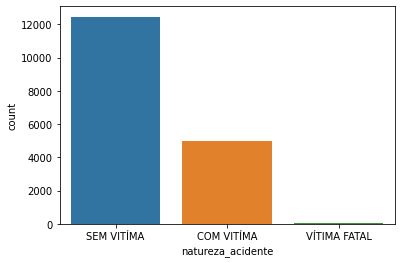

In [ ]:
sns.countplot(x = df['natureza_acidente']);

In [ ]:
grafico = px.scatter_matrix(df, dimensions=['tipo', 'vitimas'])
grafico.show()

In [ ]:
grafico = px.scatter_matrix(df, dimensions=['tipo', 'vitimas'])
grafico.show()

In [ ]:
%matplotlib inline
dados.hist(column="Ano do Acidente",by="Turno")

plt.show()

KeyError: ignored

# **Limpando o dataset**

Processo para recuperação de valores exclusivamente necessários para a analise do projeto.

* Indentificar e retificar a tabela retirando valores nulos e informações sem abrangencia para o artigo.

* Criar filtros para facilitar a exploração dos dados









# **Tratamento da tabela com os dados de 2019 a 2021**

Carregando tabelas e unindo

In [ ]:
url1 = requests.get("https://raw.githubusercontent.com/juliathemelo/machine_learning_pygil-Projeto3/master/datasets/acidentes-2019.csv").content
df_2019= pd.read_csv(io.StringIO(url1.decode('utf-8')))
url2 = requests.get("https://raw.githubusercontent.com/juliathemelo/machine_learning_pygil-Projeto3/master/datasets/acidentes_2020.csv").content
df_2020= pd.read_csv(io.StringIO(url2.decode('utf-8')),sep=";")
url3 = requests.get("https://raw.githubusercontent.com/juliathemelo/machine_learning_pygil-Projeto3/master/datasets/acidentes2021.csv").content
df_2021 = pd.read_csv(io.StringIO(url3.decode('utf-8')))

In [ ]:
df_2019.drop(columns=['Unnamed: 25'], inplace=True)

In [ ]:

df = pd.concat([df_2019,df_2020,df_2021])

Apagando datas nulas

In [ ]:
horasnulas = df[df['hora'].isnull() == True]
# df.drop(horasnulas, axis=0, inplace= True)

df.loc[(df['hora'].isnull() == True), 'hora'] = '00:00:00'

Unindo data e hora e apagando a coluna "hora"

In [ ]:
data = df['data'] +' ' + df['hora']
df['data'] = pd.to_datetime(data, errors='coerce')

In [ ]:
df.drop(columns=['hora'], inplace=True)

Verificando datas nulas 

In [ ]:
df.loc[(df['data'].isnull() == True), 'data'] = 'NÃO INFORMADO'

###Verificando endereço e bairros vazios

In [ ]:

df.loc[(df['bairro'].isnull() == True) | (df['endereco'].isnull() == True), 'bairro'] = 'NÃO INFORMADO'
df.loc[(df['bairro'] == 'NÃO INFORMADO') & (df['endereco'].isnull() == True), 'endereco'] = 'NÃO INFORMADO'

In [ ]:
df['auto'] = df['auto'].replace(np.nan, 0.0)
df['moto'] = df['moto'].replace(np.nan, 0.0)
df['ciclista'] = df['ciclista'].replace(np.nan, 0.0)
df['pedestre'] = df['pedestre'].replace(np.nan, 0.0)
df['onibus'] = df['onibus'].replace(np.nan, 0.0)
df['caminhao'] = df['caminhao'].replace(np.nan, 0.0)
df['viatura'] = df['viatura'].replace(np.nan, 0.0)
df['outros'] = df['outros'].replace(np.nan, 0.0)
df['vitimas'] = df['vitimas'].replace(np.nan, 0.0)
df['vitimas_fatais'] = df['vitimas_fatais'].replace(np.nan, 0.0)

#### Formatação da natureza do acidente (verificação e substituição)

In [ ]:
df.loc[(df['vitimas'] < 1) & (df['vitimas_fatais']  < 1), 'natureza_acidente'] = "SEM VITÍMA"
df.loc[(df['vitimas'] >= 1) & (df['vitimas_fatais']  < 1), 'natureza_acidente'] = "COM VITÍMA"
df.loc[(df['vitimas_fatais'] > 0), 'natureza_acidente'] = "VÍTIMA FATAL"

#### Formatação dos tipos de acidente

In [ ]:
df['tipo'] = df['tipo'].replace(['COLISÃO TRASEIRA','COLISÃO FRONTAL','COLISÃO LATERAL','COLISÃO COM CICLISTA','COLISÃO TRANSVERSAL'],'COLISÃO')

df['tipo']= df['tipo'].replace(['ATROPELAMENTO DE PESSOA'],['ATROPELAMENTO'])

df['tipo'].mode()
df.loc[df['tipo'].isnull() == True, 'tipo'] = 'COLISÃO'

#### Convertendo valores nulos das tabelas de float para 0

In [ ]:
df.loc[(df['tempo_clima'].isnull() == True), 'tempo_clima'] = "Sem informação"
df.loc[(df['situacao_semaforo'].isnull() == True), 'situacao_semaforo'] = "Não existe"
df.loc[(df['sinalizacao'].isnull() == True) | (df['sinalizacao'] == "Não existe"), 'sinalizacao'] = "Não existente"
df.loc[(df['condicao_via'].isnull() == True), 'condicao_via'] = "Outros"
df.loc[(df['conservacao_via'].isnull() == True), 'conservacao_via'] = "Outros"
df.loc[(df['ponto_controle'].isnull() == True), 'ponto_controle'] = "Não existe"
df.loc[(df['situacao_placa'].isnull() == True), 'situacao_placa'] = "Não há placas"
df.loc[(df['velocidade_max_via'].isnull() == True), 'velocidade_max_via'] = "Não há placas"


df.loc[(df['ano'] != '2019') & (df['ano']  != 2020) & (df['ano']  != 2021), 'ano'] = 2021
df.ano.value_counts()

2019    12049
2020     4092
2021     1331
Name: ano, dtype: int64

###Tratando dados incoerentes

In [ ]:
df

,data,natureza_acidente,bairro,endereco,tipo,auto,moto,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimas_fatais,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,ano,rpa
0,2019-01-01 00:41:00,SEM VITÍMA,IPSEP,AV RECIFE,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,60 km/h,2019,SUL
1,2019-01-01 01:37:00,SEM VITÍMA,BOA VIAGEM,RUA PADRE BERNADINO PESSOA,ABALROAMENTO TRANSVERSAL,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,Não há placas,2019,SUL
2,2019-01-01 14:20:00,SEM VITÍMA,BOA VIAGEM,AV ENGENHEIRO DOMINGOS FERREIRA,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019,SUL
3,2019-01-01 02:53:00,SEM VITÍMA,IMBIRIBEIRA,AV GENERAL MAC ARTHUR,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019,SUL
4,2019-01-01 08:17:00,COM VITÍMA,JAQUEIRA,RUA TITO ROSAS,COLISÃO,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,40 km/h,2019,NOROESTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,2021-07-31 14:30:00,COM VITÍMA,GRAÇAS,AV GOVERNADOR AGAMENON MAGALHAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021,NOROESTE
1314,2021-07-31 15:39:00,COM VITÍMA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021,SUL
1315,2021-07-31 16:24:00,COM VITÍMA,CAMPO GRANDE,RUA PROFESSOR FRANCISCO DA TRINDADE,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2021,NORTE
1316,2021-07-31 20:19:00,COM VITÍMA,ALTO JOSÉ BONIFÁCIO,RUA ALTO JOSE BONIFACIO,COLISÃO,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2021,NOROESTE


In [ ]:
df.loc[(df['auto'] == 'COLISÃO TRASEIRA'), 'auto'] = 0.0
df.loc[(df['auto'] == 'COLISÃO FRONTAL'), 'auto'] = 0.0
df.loc[(df['auto'] == 'ABALROAMENTO TRANSVERSAL'), 'auto'] = 0.0
df.loc[(df['auto'] == 'ABALROAMENTO LONGITUDINAL'), 'auto'] = 0.0

In [ ]:
df.loc[(df['situacao_semaforo'] == 'Bom'), 'situacao_semaforo'] = "Sem defeito"
df.loc[(df['situacao_semaforo'] == 'Nublado'), 'situacao_semaforo'] = "Sem defeito"


In [ ]:
df.loc[(df['sinalizacao'] == 'Sem defeito'), 'sinalizacao'] = "Não existente"

In [ ]:
df.loc[(df['condicao_via'] == 'Ilegível'), 'condicao_via'] = "Outros"

In [ ]:
df.loc[(df['conservacao_via'] == 'Seca'), 'conservacao_via'] = "Outros"
df.loc[(df['conservacao_via'] == 'Molhada'), 'conservacao_via'] = "Outros"

In [ ]:
df.loc[(df['ponto_controle'] == 'Perfeito estado'), 'ponto_controle'] = "Não existe"
df.loc[(df['ponto_controle'] == 'Mal iluminada'), 'ponto_controle'] = "Não existe"

In [ ]:
df.loc[(df['situacao_placa'] == 'Outros'), 'situacao_placa'] = "Não há placas"
df.loc[(df['situacao_placa'] == 'Não existe'), 'situacao_placa'] = "Não há placas"

In [ ]:
df.loc[(df['velocidade_max_via'] == '60KM'), 'velocidade_max_via'] = "60 km/h"
df.loc[(df['velocidade_max_via'] == '60km'), 'velocidade_max_via'] = "60 km/h"
df.loc[(df['velocidade_max_via'] == '60 KM/H'), 'velocidade_max_via'] = "60 km/h"
df.loc[(df['velocidade_max_via'] == '60km/h'), 'velocidade_max_via'] = "60 km/h"
df.loc[(df['velocidade_max_via'] == '40KM'), 'velocidade_max_via'] = "40 km/h"
df.loc[(df['velocidade_max_via'] == '40km'), 'velocidade_max_via'] = "40 km/h"
df.loc[(df['velocidade_max_via'] == '30 e 40 km/h'), 'velocidade_max_via'] = "40 km/h"
df.loc[(df['velocidade_max_via'] == '40km/h'), 'velocidade_max_via'] = "40 km/h"
df.loc[(df['velocidade_max_via'] == '30KM'), 'velocidade_max_via'] = "30 km/h"
df.loc[(df['velocidade_max_via'] == '20km'), 'velocidade_max_via'] = "20 km/h"
df.loc[(df['velocidade_max_via'] == 'n/i'), 'velocidade_max_via'] = "N/I"
df.loc[(df['velocidade_max_via'] == 'Placas Pare'), 'velocidade_max_via'] = "Outras"
df.loc[(df['velocidade_max_via'] == 'R-6a'), 'velocidade_max_via'] = "Outras"


### Tentar dividir os bairros de acordo com a Região Político Administrativa(RPA)

Tratando valores de bairros inconsistentes 

In [ ]:
df.loc[df['bairro'] == 'JOANA BEZERRA', 'bairro'] = 'ILHA JOANA BEZERRA'
df.loc[df['bairro'] == 'BOMBA DO HEMETERIO', 'bairro'] = 'BOMBA DO HEMETÉRIO'

Armazenando os bairros em listas de suas respectivas RPA

In [ ]:
zona_centro = ['BOA VISTA', 'CABANGA', 'COELHOS', 'ILHA DO LEITE',  'ILHA JOANA BEZERRA',  'PAISSANDU',   'BAIRRO DO RECIFE',  'SANTO AMARO',   'SANTO ANTÔNIO', 'SÃO JOSÉ', 'SOLEDADE']
zona_norte = ['ÁGUA FRIA', 'ALTO SANTA TERESINHA', 'ARRUDA',  'BEBERIBE',  'BOMBA DO HEMETÉRIO',  'CAJUEIRO', 'CAMPINA DO BARRETO', 'CAMPO GRANDE',
     'DOIS UNIDOS', 'ENCRUZILHADA', 'FUNDÃO',   'HIPÓDROMO',  'LINHA DO TIRO', 'PEIXINHOS', 'PONTO DE PARADA', 'PORTO DA MADEIRA',   'ROSARINHO', 'TORREÃO']
zona_noroeste =[ 'AFLITOS',
     'ALTO DO MANDU',
     'ALTO JOSÉ BONIFÁCIO',
     'ALTO JOSÉ DO PINHO',
     'APIPUCOS',
     'BREJO DA GUABIRABA',
     'BREJO DE BEBERIBE',
     'CASA AMARELA',
     'CASA FORTE',
     'CÓRREGO DO JENIPAPO',
     'DERBY',
     'DOIS IRMÃOS',
     'ESPINHEIRO',
     'GRAÇAS',
     'GUABIRABA',
     'JAQUEIRA',
     'MACAXEIRA',
     'MANGABEIRA',
     'MONTEIRO',
     'MORRO DA CONCEIÇÃO',
     'NOVA DESCOBERTA',
     'PARNAMIRIM',
     'PASSARINHO',
     'PAU-FERRO',
     'POÇO DA PANELA',
     'SANTANA',
     'SÍTIO DOS PINTOS',
     'TAMARINEIRA',
     'VASCO DA GAMA'
]
zona_oeste =[
'CAXANGÁ',
     'CIDADE UNIVERSITÁRIA',
     'CORDEIRO',
     'ENGENHO DO MEIO',
     'ILHA DO RETIRO',
     'IPUTINGA',
     'MADALENA',
     'PRADO',
     'TORRE',
     'TORRÕES',
     'VÁRZEA',
     'ZUMBI'
     ]
zona_sul =[  
'BOA VIAGEM', 'BRASÍLIA TEIMOSA','COHAB','IBURA','IMBIRIBEIRA','IPSEP','JORDÃO','PINA'
]
zona_sudoeste =[  
'AFOGADOS',
     'AREIAS',
     'BARRO',
     'BONGI',
     'CAÇOTE',
     'COQUEIRAL',
     'CURADO',
     'ESTÂNCIA',
     'JARDIM SÃO PAULO',
     'JIQUIÁ',
     'MANGUEIRA',
     'MUSTARDINHA',
     'SAN MARTIN',
     'SANCHO',
     'TEJIPIÓ',
     'TOTÓ'
]

Adicionando coluna RPA no dataframe

In [ ]:

df.loc[:, 'rpa'] = 0
df


,data,natureza_acidente,bairro,endereco,tipo,auto,moto,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimas_fatais,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,ano,rpa
0,2019-01-01 00:41:00,SEM VITÍMA,IPSEP,AV RECIFE,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,60 km/h,2019,0
1,2019-01-01 01:37:00,SEM VITÍMA,BOA VIAGEM,RUA PADRE BERNADINO PESSOA,ABALROAMENTO TRANSVERSAL,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,Não há placas,2019,0
2,2019-01-01 14:20:00,SEM VITÍMA,BOA VIAGEM,AV ENGENHEIRO DOMINGOS FERREIRA,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019,0
3,2019-01-01 02:53:00,SEM VITÍMA,IMBIRIBEIRA,AV GENERAL MAC ARTHUR,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019,0
4,2019-01-01 08:17:00,COM VITÍMA,JAQUEIRA,RUA TITO ROSAS,COLISÃO,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,40 km/h,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,2021-07-31 14:30:00,COM VITÍMA,GRAÇAS,AV GOVERNADOR AGAMENON MAGALHAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021,0
1314,2021-07-31 15:39:00,COM VITÍMA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021,0
1315,2021-07-31 16:24:00,COM VITÍMA,CAMPO GRANDE,RUA PROFESSOR FRANCISCO DA TRINDADE,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2021,0
1316,2021-07-31 20:19:00,COM VITÍMA,ALTO JOSÉ BONIFÁCIO,RUA ALTO JOSE BONIFACIO,COLISÃO,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2021,0


Criando uma função para fazer a verificação e preenchimento da zona

In [ ]:
zonas = [zona_centro, zona_noroeste, zona_norte, zona_oeste, zona_sudoeste, zona_sul]

def select_rpa(data, lista):
  if data in lista[0]:
    return "CENTRO"
  elif data in lista[1]:
    return "NOROESTE"
  elif data in lista[2]:
    return "NORTE"  
  elif data in lista[3]:
    return "OESTE" 
  elif data in lista[4]:
    return "SUDOESTE" 
  elif data in lista[5]:
    return "SUL" 
  else:
    return 0


df['rpa'] = df['bairro'].map(lambda x:  select_rpa(x, zonas))
df

,data,natureza_acidente,bairro,endereco,tipo,auto,moto,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimas_fatais,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,ano,rpa
0,2019-01-01 00:41:00,SEM VITÍMA,IPSEP,AV RECIFE,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,60 km/h,2019,SUL
1,2019-01-01 01:37:00,SEM VITÍMA,BOA VIAGEM,RUA PADRE BERNADINO PESSOA,ABALROAMENTO TRANSVERSAL,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,Não há placas,2019,SUL
2,2019-01-01 14:20:00,SEM VITÍMA,BOA VIAGEM,AV ENGENHEIRO DOMINGOS FERREIRA,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019,SUL
3,2019-01-01 02:53:00,SEM VITÍMA,IMBIRIBEIRA,AV GENERAL MAC ARTHUR,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019,SUL
4,2019-01-01 08:17:00,COM VITÍMA,JAQUEIRA,RUA TITO ROSAS,COLISÃO,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,40 km/h,2019,NOROESTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,2021-07-31 14:30:00,COM VITÍMA,GRAÇAS,AV GOVERNADOR AGAMENON MAGALHAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021,NOROESTE
1314,2021-07-31 15:39:00,COM VITÍMA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021,SUL
1315,2021-07-31 16:24:00,COM VITÍMA,CAMPO GRANDE,RUA PROFESSOR FRANCISCO DA TRINDADE,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2021,NORTE
1316,2021-07-31 20:19:00,COM VITÍMA,ALTO JOSÉ BONIFÁCIO,RUA ALTO JOSE BONIFACIO,COLISÃO,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2021,NOROESTE


# **Exploração dos dados**

### Comparação de acidentes com vitimas fatais e sem vitimas fatais

In [ ]:
vitimas_f = df.query('natureza_acidente == "VÍTIMA FATAL"')
vitimas_f.head()

,data,natureza_acidente,bairro,endereco,tipo,auto,moto,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimas_fatais,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,ano,Unnamed: 25,rpa
38,2019-02-01 15:32:00,VÍTIMA FATAL,BONGI,EST DO BONGI,COLISÃO,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Bom,Sem defeito,Perfeito estado,Seca,Mal conservada,Outros,Não há placas,Não há placas,2019,NaN,SUDOESTE
96,2019-04-01 22:12:00,VÍTIMA FATAL,AFOGADOS,RUA COSME VIANA,ATROPELAMENTO,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,R-32,Não há placas,2019,NaN,SUDOESTE
529,2019-01-21 16:50:00,VÍTIMA FATAL,TORRE,RUA COMPOSITOR JOAO SANTIAGO,ATROPELAMENTO,1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2019,NaN,OESTE
929,2019-05-02 05:33:00,VÍTIMA FATAL,TEJIPIÓ,AV DR JOSE RUFINO,COLISÃO,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Chuvoso,Não existe,Não existente,Molhada,Outros,Não existe,Outras,Não há placas,2019,NaN,SUDOESTE
932,2019-05-02 08:17:00,VÍTIMA FATAL,BEBERIBE,AV BEBERIBE,ABALROAMENTO LONGITUDINAL,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2019,NaN,NORTE


In [ ]:
vitimas_n = df.query('natureza_acidente == "COM VITÍMA"')
vitimas_n.head()

,data,natureza_acidente,bairro,endereco,tipo,auto,moto,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimas_fatais,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,ano,Unnamed: 25,rpa
4,2019-01-01 08:17:00,COM VITÍMA,JAQUEIRA,RUA TITO ROSAS,COLISÃO,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,40 km/h,2019,NaN,NOROESTE
5,2019-01-01 09:30:00,COM VITÍMA,IBURA,AV DOIS RIOS,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,30 km/h,2019,NaN,SUL
6,2019-01-01 09:54:00,COM VITÍMA,SAN MARTIN,AV GENERAL SAN MARTIN,CHOQUE OBJETO FIXO,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Outros,R-6a,40 km/h,2019,NaN,SUDOESTE
9,2019-01-01 16:01:00,COM VITÍMA,CAMPO GRANDE,EST DE BELEM,ATROPELAMENTO,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019,NaN,NORTE
12,2019-01-01 20:30:00,COM VITÍMA,ESTÂNCIA,AV DR JOSE RUFINO,COLISÃO,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Não existe,Outras,Não há placas,2019,NaN,SUDOESTE


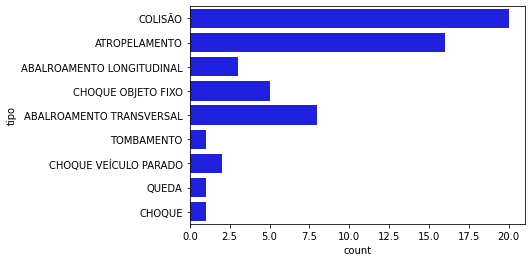

In [ ]:
sns.countplot(y = vitimas_f['tipo'], color='blue');


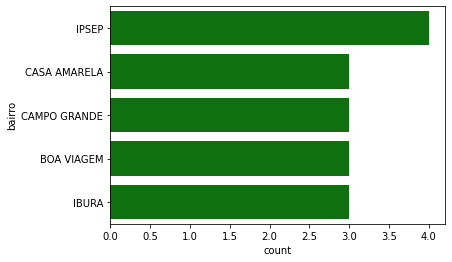

In [ ]:
sns.countplot(y = vitimas_f['bairro'], color="green", order=vitimas_f.bairro.value_counts().iloc[:5].index);

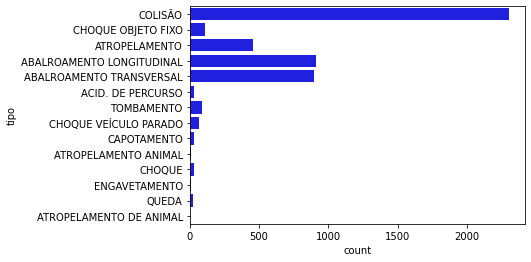

In [ ]:
sns.countplot(y = vitimas_n['tipo'], color="blue");

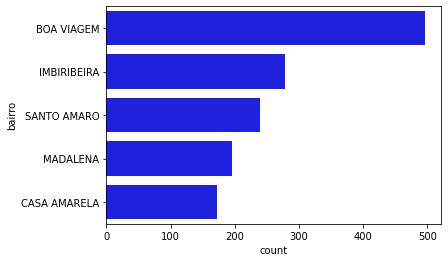

In [ ]:
sns.countplot(y = vitimas_n['bairro'], color='blue', order=vitimas_n.bairro.value_counts().iloc[:5].index);

### Exploração de acidentes ocassionados pela falta de manuntenção das vias que influenciam nos acidentes

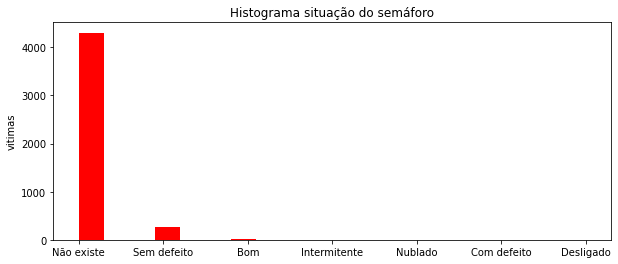

In [ ]:
vias = df.loc[(df['conservacao_via'] != 'Perfeito estado')]

_ = plt.figure(figsize=(10, 4))
_ = plt.hist(data=vias, x="situacao_semaforo", bins=20, rwidth=1,  color="red")
_ = plt.ylabel("vitimas")
_ = plt.title("Histograma situação do semáforo")

In [ ]:
df.tipo.value_counts()

COLISÃO                      8434
ABALROAMENTO LONGITUDINAL    4831
ABALROAMENTO TRANSVERSAL     2411
CHOQUE VEÍCULO PARADO         493
ATROPELAMENTO                 476
CHOQUE OBJETO FIXO            360
CHOQUE                        141
TOMBAMENTO                     92
ENGAVETAMENTO                  59
CAPOTAMENTO                    46
ACID. DE PERCURSO              43
SEMÁFORO                       41
QUEDA                          25
ATROPELAMENTO ANIMAL           12
ALAGAMENTO                      3
ATROPELAMENTO DE ANIMAL         1
OUTROS APOIOS                   1
MONITORAMENTO                   1
SUBURBIO                        1
APOIO COMPESA                   1
Name: tipo, dtype: int64

## Random Forest Para Identificar Acidente Fatal

In [ ]:
#tentando aplicar o random forest
from pandas.api.types import CategoricalDtype

natureza_category = ['COM VITÍMA','VÍTIMA FATAL']
df.loc[(df['tipo'] == 'CAPOTAMENTO') | (df['tipo'] == 'ABALROAMENTO TRANSVERSAL') | (df['tipo'] == 'ATROPELAMENTO'), 'natureza_acidente'] = 'VÍTIMA FATAL'
value = df[(df['natureza_acidente'] == 'SEM VITÍMA')].index
df.drop(value, inplace=True)
#tempo_category = ['Bom','Sem informação','Chuvoso','Nublado']
#semaforo_category = ['Não existe', 'Sem defeito', 'Intermitente ', 'Com defeito', 'Desligado', 'Bom', 'Nublado']
#sinalizacao_category = ['Perfeito estado', 'Não existente', 'Incompleta ', 'Ilegível', 'Sem defeito']
#condicao_via_category = ['Seca', 'Outros', 'Molhada ', 'Oleosa', 'Perfeito estado', 'Ilegível']
#conservacao_via_category = ['Perfeito estado', 'Outros', 'Mal conservada ', 'Mal iluminada', 'Seca', 'Molhada']
#ano_category = ['2019', 2020, 2021]

def setCategoryColumns(column, categors):
  return column.astype(CategoricalDtype(categories=categors, ordered=True)).cat.codes

df.natureza_acidente = setCategoryColumns(df.natureza_acidente, natureza_category)
#df.tempo_clima = setCategoryColumns(df.tempo_clima, tempo_category)
#df.situacao_semaforo = setCategoryColumns(df.situacao_semaforo, semaforo_category)
#df.sinalizacao = setCategoryColumns(df.sinalizacao, sinalizacao_category)
#df.condicao_via = setCategoryColumns(df.condicao_via, condicao_via_category)
#df.conservacao_via = setCategoryColumns(df.conservacao_via, conservacao_via_category)
#df.ano = setCategoryColumns(df.ano, ano_category)
df.natureza_acidente.value_counts()

In [ ]:
features = ["sinalizacao", "ano", "condicao_via"]
acidente = "natureza_acidente"

In [ ]:

# para modelagem
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid, KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
!pip install --upgrade category_encoders
import category_encoders as ce

In [ ]:
X = df[features]
y = df[acidente]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=999
)

In [ ]:
cat_feature = ["sinalizacao", "condicao_via"]
num_feature = ["ano"]


encoder = ce.OneHotEncoder(cols=cat_feature)

X_train = encoder.fit_transform(X_train)

X_train.head()

In [ ]:
X_test = encoder.transform(X_test)

X_test.head()

In [ ]:
classificador = RandomForestClassifier()
classificador.fit(X_train, y_train) 

In [ ]:
#previsao (passando os testes)
y_pred = classificador.predict(X_test)

y_pred

In [ ]:
#Algoritmo para excontrar os melhores parametros para um melhor resultado do treinamento
param_grid = {
    "max_depth": [4, 5, 6],
    "max_features": ["auto", "sqrt"],
    "n_estimators": [20, 50, 100]
}

cf = RandomForestClassifier()
cf_cv = GridSearchCV(estimator=cf, param_grid=param_grid, cv=3)
cf_cv.fit(X_train, y_train)

cf_cv.best_params_

In [ ]:
from sklearn.metrics import accuracy_score, recall_score

print("Acurácia: " + str(accuracy_score(y_test, y_pred)))  # acertos ao todo

print(recall_score(y_test,y_pred))
from sklearn.metrics import confusion_matrix

print("Matriz de Confusão : \n" + str(confusion_matrix(y_test, y_pred)))

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 50, max_depth=6)
rfc1.fit(X_train, y_train)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(14,7))
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('True Positive')
plt.ylabel('False Positive')

# Tentando gerar gráficos para analisar os bairros

In [ ]:
df

,data,natureza_acidente,bairro,endereco,tipo,auto,moto,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimas_fatais,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,ano,Unnamed: 25,rpa
0,2019-01-01 00:41:00,SEM VITÍMA,IPSEP,AV RECIFE,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,60 km/h,2019,NaN,SUL
1,2019-01-01 01:37:00,SEM VITÍMA,BOA VIAGEM,RUA PADRE BERNADINO PESSOA,ABALROAMENTO TRANSVERSAL,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,Não há placas,2019,NaN,SUL
2,2019-01-01 14:20:00,SEM VITÍMA,BOA VIAGEM,AV ENGENHEIRO DOMINGOS FERREIRA,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019,NaN,SUL
3,2019-01-01 02:53:00,SEM VITÍMA,IMBIRIBEIRA,AV GENERAL MAC ARTHUR,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019,NaN,SUL
4,2019-01-01 08:17:00,COM VITÍMA,JAQUEIRA,RUA TITO ROSAS,COLISÃO,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,40 km/h,2019,NaN,NOROESTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,2021-07-31 14:30:00,COM VITÍMA,GRAÇAS,AV GOVERNADOR AGAMENON MAGALHAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021,NaN,NOROESTE
1314,2021-07-31 15:39:00,COM VITÍMA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021,NaN,SUL
1315,2021-07-31 16:24:00,COM VITÍMA,CAMPO GRANDE,RUA PROFESSOR FRANCISCO DA TRINDADE,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2021,NaN,NORTE
1316,2021-07-31 20:19:00,COM VITÍMA,ALTO JOSÉ BONIFÁCIO,RUA ALTO JOSE BONIFACIO,COLISÃO,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2021,NaN,NOROESTE


In [ ]:
graph = px.treemap(vitimas_f, path = [px.Constant("REGIÕES"),'rpa','tipo', 'bairro', 'ano'],
                  color='rpa', color_discrete_map={'(?)':'lightgrey', 'SUL':'navy', 'NOROESTE':'darkblue','NORTE':'blue', 'OESTE':'royalblue', 'CENTRO':'reflexblue','SUDOESTE':'midnightblue'}
                  )

graph

In [ ]:
graph_bairros = px.treemap(df, path = [px.Constant("REGIÕES"),'rpa', 'bairro','tipo','natureza_acidente'],color='rpa', color_discrete_map={'(?)':'lightgrey', 'SUL':'navy', 'NOROESTE':'darkblue','NORTE':'blue', 'OESTE':'royalblue', 'CENTRO':'reflexblue','SUDOESTE':'midnightblue',0: 'gold'})
graph_bairros

In [ ]:
graph_rpa = px.treemap(df, path = ['rpa', 'tipo'])
graph_rpa

In [ ]:
df_vitimas = df.loc[(df['natureza_acidente'] == 'COM VITÍMA') | ((df['natureza_acidente'] == 'VÍTIMA FATAL'))].copy()
df_vitimas

,data,natureza_acidente,bairro,endereco,tipo,auto,moto,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimas_fatais,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,ano,Unnamed: 25,rpa
4,2019-01-01 08:17:00,COM VITÍMA,JAQUEIRA,RUA TITO ROSAS,COLISÃO,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,40 km/h,2019,NaN,NOROESTE
5,2019-01-01 09:30:00,COM VITÍMA,IBURA,AV DOIS RIOS,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,30 km/h,2019,NaN,SUL
6,2019-01-01 09:54:00,COM VITÍMA,SAN MARTIN,AV GENERAL SAN MARTIN,CHOQUE OBJETO FIXO,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Outros,R-6a,40 km/h,2019,NaN,SUDOESTE
9,2019-01-01 16:01:00,COM VITÍMA,CAMPO GRANDE,EST DE BELEM,ATROPELAMENTO,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019,NaN,NORTE
12,2019-01-01 20:30:00,COM VITÍMA,ESTÂNCIA,AV DR JOSE RUFINO,COLISÃO,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Não existe,Outras,Não há placas,2019,NaN,SUDOESTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,2021-07-31 09:14:00,COM VITÍMA,CAXANGÁ,AV CAXANGA,COLISÃO,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Chuvoso,Não existe,Perfeito estado,Molhada,Perfeito estado,Não existe,Não há placas,Não há placas,2021,NaN,OESTE
1313,2021-07-31 14:30:00,COM VITÍMA,GRAÇAS,AV GOVERNADOR AGAMENON MAGALHAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021,NaN,NOROESTE
1314,2021-07-31 15:39:00,COM VITÍMA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021,NaN,SUL
1315,2021-07-31 16:24:00,COM VITÍMA,CAMPO GRANDE,RUA PROFESSOR FRANCISCO DA TRINDADE,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2021,NaN,NORTE


In [ ]:


graph_bairros_parallel = px.parallel_categories(df_vitimas, dimensions=['rpa','situacao_semaforo','conservacao_via', 'natureza_acidente'],             
                labels={'rpa':'Regiões', 'situacao_semaforo':'Condição do semaforo', 'conservacao_via':'Conservação da via', 'natureza_acidente':'Tipo de acidente'})
graph_bairros_parallel.show()


In [ ]:
graph_bairros_parallel = px.parallel_categories(df, dimensions=['auto','tempo_clima'])
graph_bairros_parallel.show()